In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [9]:
data = pd.read_csv('coffee-roasting.csv')
training = data.to_numpy()

#print(training[:4,:])
X_train = training[:,:2]
Y_train = training[:,2:]
print(X_train.shape)
print(Y_train.shape)

(200, 2)
(200, 1)


In [10]:
def plot_areas(x, y, ax):
    """
    Input:
        x: NdArray with shape (N,2)
        y: NDArray with shape (N,1)
    
    Output:
        Plots x[0] in x asis and x[y] in y asis. Plots y corresponding to each value.
        
    """
    scale_false = lambda t: 50 if (t == 0) else 0
    scale_true  = lambda t: 50 if (t == 1) else 0
    color = lambda t: "r" if (t == 0) else "b"
    
    area1 = np.array([scale_false(yi) for yi in y])
    area2 = np.array([scale_true(yi) for yi in y])
    colors = np.array([color(yi) for yi in y])
    ax.scatter(x[:,0], x[:,1], area1,marker='x',c=colors, label="Y=0")
    ax.scatter(x[:,0], x[:,1], area2,marker='o',c=colors, label="Y=1")

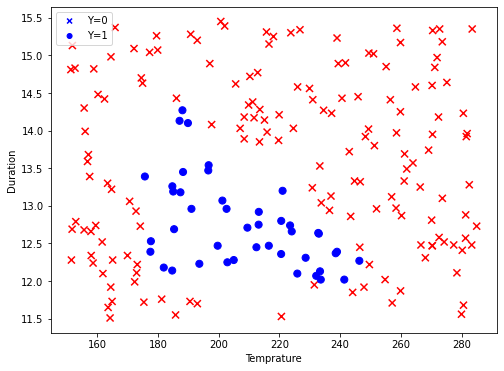

In [14]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
plot_areas(X_train, Y_train, ax)
ax.set_xlabel("Temprature")
ax.set_ylabel("Duration")
plt.legend()
plt.show()

Normalization

Min temp is 151.32 Max temp is 284.99
Min duratin is 11.51 Max duration is 15.45
Norm - Min temp is -1.6853083372116089 Max temp is 1.6596596240997314
Norm - Min duratin is -1.7021071910858154 Max duration is 1.7897573709487915


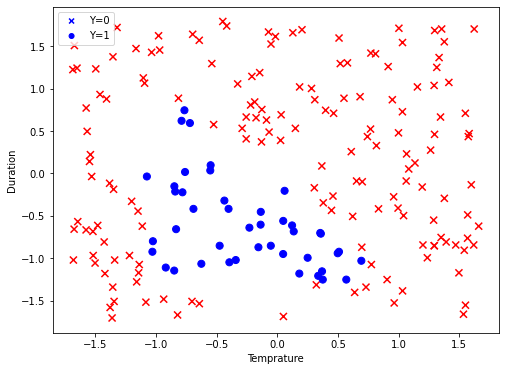

In [20]:
print(f'Min temp is {np.min(X_train[:,0])} Max temp is {np.max(X_train[:,0])}')
print(f'Min duratin is {np.min(X_train[:,1])} Max duration is {np.max(X_train[:,1])}')

norm_layer = tf.keras.layers.Normalization(axis=-1)
norm_layer.adapt(X_train)
Xn = norm_layer(X_train)

print(f'Norm - Min temp is {np.min(Xn[:,0])} Max temp is {np.max(Xn[:,0])}')
print(f'Norm - Min duratin is {np.min(Xn[:,1])} Max duration is {np.max(Xn[:,1])}')


fig,ax = plt.subplots(1,1,figsize=(8,6))
plot_areas(Xn, Y_train, ax)
ax.set_xlabel("Temprature")
ax.set_ylabel("Duration")
plt.legend()
plt.show()


(200000, 2) (200000, 1)


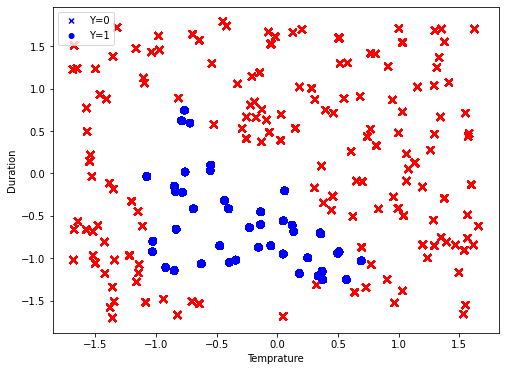

In [23]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y_train,(1000,1))   
print(Xt.shape, Yt.shape)  

fig,ax = plt.subplots(1,1,figsize=(8,6))
plot_areas(Xt, Yt, ax)
ax.set_xlabel("Temprature")
ax.set_ylabel("Duration")
plt.legend()
plt.show()

We will build a model with 2 layers - layer 1 with 3 nueron (units) and second layer with 1 unit.

In [25]:
model = Sequential([
    tf.keras.layers.Input(shape=(2,)),
    Dense(3, activation='sigmoid', name='L1'),
    Dense(1, activation='sigmoid', name='L2'),
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 3)                 9         
                                                                 
 L2 (Dense)                  (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [27]:
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.12671089  0.6254777  -0.7106748 ]
 [-0.9040129   0.7430247  -0.41977215]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.99317396]
 [ 0.6737188 ]
 [ 0.28654385]] 
b2(1,): [0.]


In [28]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 5s 645us/step - loss: 0.1834
Epoch 2/10
6250/6250 [==============================] - 4s 619us/step - loss: 0.1183
Epoch 3/10
6250/6250 [==============================] - 4s 662us/step - loss: 0.0663
Epoch 4/10
6250/6250 [==============================] - 4s 636us/step - loss: 0.0183
Epoch 5/10
6250/6250 [==============================] - 4s 670us/step - loss: 0.0110
Epoch 6/10
6250/6250 [==============================] - 4s 610us/step - loss: 0.0074
Epoch 7/10
6250/6250 [==============================] - 4s 608us/step - loss: 0.0051
Epoch 8/10
6250/6250 [==============================] - 4s 602us/step - loss: 0.0036
Epoch 9/10
6250/6250 [==============================] - 4s 603us/step - loss: 0.0025
Epoch 10/10
6250/6250 [==============================] - 4s 604us/step - loss: 0.0018


In [30]:
W1, b1 = model.get_layer("L1").get_weights()
W2, b2 = model.get_layer("L2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 14.519695   -10.9124155    0.10107525]
 [ 12.15573     -0.2851517   10.267213  ]] 
b1: [  1.9774525 -11.753462   12.271296 ]
W2:
 [[-45.843086]
 [-53.594723]
 [ 43.627422]] 
b2: [-13.311448]


In [32]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_layer(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 68ms/step
predictions = 
 [[9.8854637e-01]
 [1.7559775e-07]]


In [33]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


14.519695281982422, 12.155730247497559, 1.9774525165557861
-0.13619106
-0.16267657


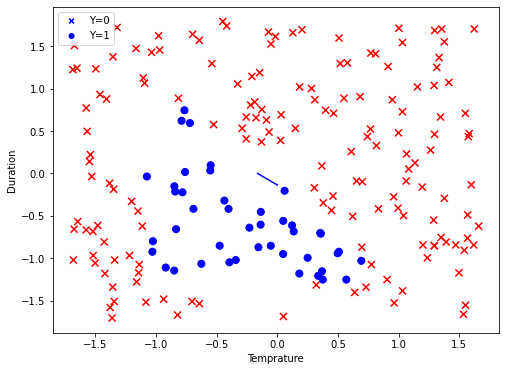

In [42]:
w11 = W1[0,0]
w12 = W1[1,0]
b11 = b1[0]

print(f'{w11}, {w12}, {b11}')

x2 = -b11/w12
x1 = -b11/w11

print(x1)
print(x2)

fig,ax = plt.subplots(1,1,figsize=(8,6))
plot_areas(Xn, Y_train, ax)

ax.plot([0, x2], [x1,0], c="b")

ax.set_xlabel("Temprature")
ax.set_ylabel("Duration")
plt.legend()
plt.show()
